# Random Forest Training
Including North American sales figures

### Imports

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



### Loading the preprocessed data

In [5]:
data = pd.read_csv('../Data/preprocessed_vgsales.csv')

### Training and testing the random forest

In [6]:
X = pd.get_dummies(data[['Platform_Creator', 'Publisher', 'Genre', 'NA_Sales']])
y = data['Global_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf=RandomForestRegressor(n_estimators=100)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

### Calculating performance

In [7]:
mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.6923263437495891
R-squared: 0.7931680090108293


# Graphing feature importances

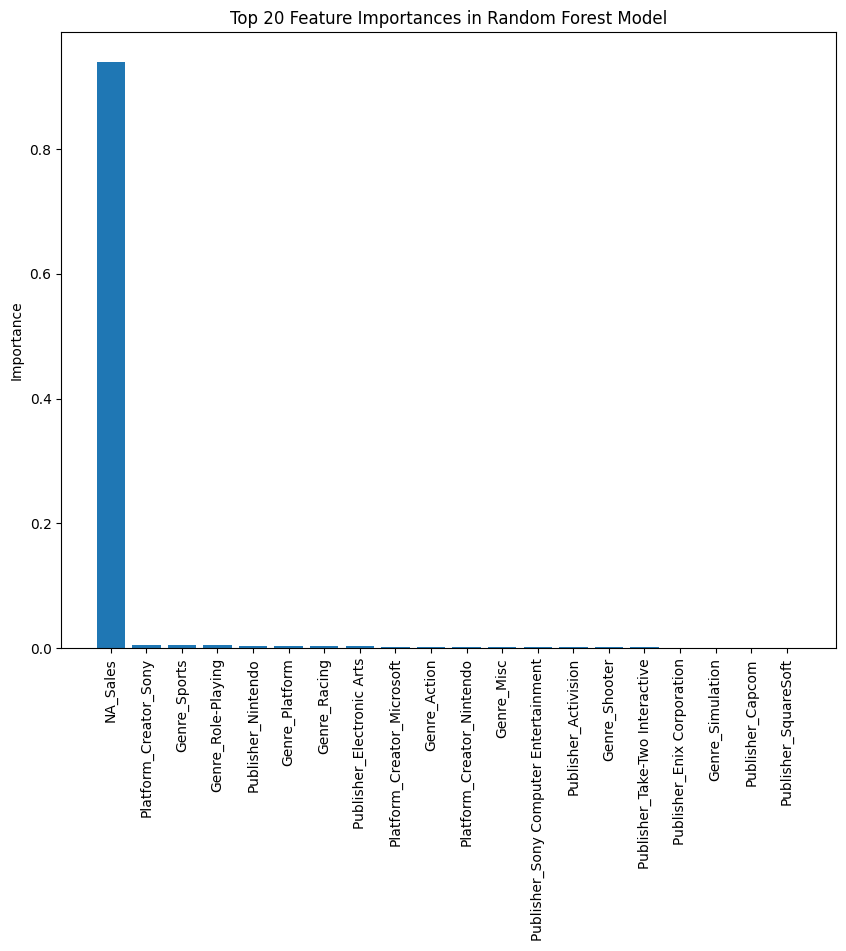

In [8]:
importances = clf.feature_importances_

# Create labels from the feature names
feature_labels = X.columns

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Select the top N features
topFeatures = 20 
topIndices = indices[:topFeatures]

# Create the plot for the top N features
plt.figure(figsize=(10, 8))
plt.title('Top 20 Feature Importances in Random Forest Model 2')
plt.bar(range(topFeatures), importances[topIndices], align='center')
plt.xticks(range(topFeatures), np.array(feature_labels)[topIndices], rotation=90)
plt.ylabel('Importance')
plt.show()